#### Data Preprocessing

In [23]:
import pandas as pd
import datetime
import numpy as np
import random
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_rows', 1000)  # Set the maximum number of displayed rows to 100
pd.set_option('display.max_columns', 1000)  # Set the maximum number of displayed columns to 50

seed_value = 100  # you can set a seed value of your choice

np.random.seed(seed_value)  # seed for NumPy
random.seed(seed_value)  # seed for Python random module

# # plt.rcParams["figure.figsize"] = [8, 6]  # set the figure size
# plt.rcParams["figure.dpi"] = 250  # set the resolution in dpi

In [24]:
import pandas as pd
import datetime
from pathlib import Path

# Your data directory
data_path = Path('/home/sayem/Desktop/Lobster/data')

# Assume these are your file names
MSGFileName = data_path / "INTC_2012-06-21_34200000_57600000_message_5.csv"
LOBFileName = data_path / "INTC_2012-06-21_34200000_57600000_orderbook_5.csv"

# Extracting the date from the filename
ticker, rem = MSGFileName.name.split('_', 1)
date = rem.split('_', 1)[0]

# Convert date into datetime format
date = datetime.datetime.strptime(date, '%Y-%m-%d')

# Message file
DSMSG = pd.read_csv(MSGFileName, header=None)
DSMSG.columns = ["Time", "Type", "OrderID", "Size", "Price", "Direction"]

# Data file
DSLOB = pd.read_csv(LOBFileName, header=None)

# Assuming you have 20 columns in DSLOB
DSLOB.columns = ["AskPrice1", "AskSize1", "BidPrice1", "BidSize1",
                 "AskPrice2", "AskSize2", "BidPrice2", "BidSize2",
                 "AskPrice3", "AskSize3", "BidPrice3", "BidSize3",
                 "AskPrice4", "AskSize4", "BidPrice4", "BidSize4",
                 "AskPrice5", "AskSize5", "BidPrice5", "BidSize5"]

# Convert 'Time' to datetime format and calculate seconds from midnight
DSMSG['Time'] = pd.to_timedelta(DSMSG['Time'], unit='s')

# Add the actual date to 'Time'
DSMSG['Time'] = date + DSMSG['Time']

# Combine DSMSG and DSLOB
TimeVariable = DSMSG["Time"]
LOB3Variables = DSLOB[["AskPrice1", "AskSize1", "BidPrice1", "BidSize1",
                       "AskPrice2", "AskSize2", "BidPrice2", "BidSize2",
                       "AskPrice3", "AskSize3", "BidPrice3", "BidSize3"]]

## LOB lavel 3 data
combined_orderbook_data = pd.concat([TimeVariable, LOB3Variables], axis=1)


In [25]:
combined_orderbook_data.head(10)

,Time,AskPrice1,AskSize1,BidPrice1,BidSize1,AskPrice2,AskSize2,BidPrice2,BidSize2,AskPrice3,AskSize3,BidPrice3,BidSize3
0,2012-06-21 09:30:00.005742728,275200,66,275100,400,275300,1000,275000,100,275400,373,274900,200
1,2012-06-21 09:30:00.006241020,275200,166,275100,400,275300,1000,275000,100,275400,373,274900,200
2,2012-06-21 09:30:00.006461694,275200,166,275100,400,275300,1000,275000,100,275400,373,274900,200
3,2012-06-21 09:30:00.048863815,275200,166,275100,400,275300,1000,274900,200,275400,373,274800,661
4,2012-06-21 09:30:00.048883439,275200,166,275100,300,275300,1000,274900,200,275400,373,274800,661
5,2012-06-21 09:30:00.048989220,275200,166,275100,300,275300,1000,275000,100,275400,373,274900,200
6,2012-06-21 09:30:00.049010886,275200,166,275100,300,275300,1000,275000,100,275400,373,274900,700
7,2012-06-21 09:30:00.049078453,275200,166,275100,300,275300,1000,275000,100,275400,373,274900,700
8,2012-06-21 09:30:00.049110147,275200,166,275100,300,275300,1000,275000,100,275400,373,274900,700
9,2012-06-21 09:30:00.049300503,275200,166,275100,300,275300,1000,275000,300,275400,373,274900,700


In [26]:
combined_orderbook_data.Time.min()

Timestamp('2012-06-21 09:30:00.005742728')

In [27]:
combined_orderbook_data.Time.max()

Timestamp('2012-06-21 15:59:59.948441634')

In [28]:
combined_orderbook_data.shape

(581030, 13)

2012-06-21 11:00:00
2012-06-21 11:00:01
Number of rows around 11 AM: (20, 13)


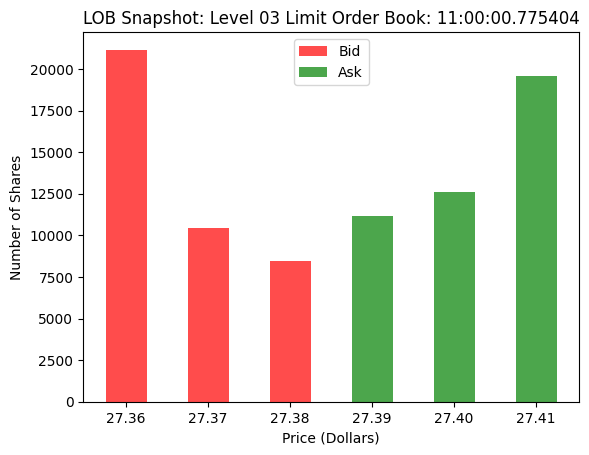

In [29]:
from datetime import datetime, time, timedelta
import pandas as pd
import matplotlib.pyplot as plt

data = combined_orderbook_data

time_viz = '2012-06-21 11:00:00.000000'

time_viz = pd.to_datetime(time_viz)

one_second = timedelta(seconds=1
                       )  # timedelta object for one second
start_time = time_viz
print(start_time)
end_time = time_viz + one_second
print(end_time)

sampleLOB = data[(data['Time'] >= start_time) & 
                 (data['Time'] <= end_time)]


# sampleLOB.head(100)
print("Number of rows around 11 AM:", sampleLOB.shape)

# Get the midtime snapshot
mid_index = len(sampleLOB) // 2
columns_of_interest = ['BidPrice1', 'BidPrice2', 'BidPrice3', 'BidSize1', 'BidSize2', 'BidSize3', 
                       'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskSize1', 'AskSize2', 'AskSize3', 
                       'Time']
sampleLOB = sampleLOB[columns_of_interest].iloc[mid_index]

# Extract data
sampleBidPrices = [sampleLOB['BidPrice1'], sampleLOB['BidPrice2'], sampleLOB['BidPrice3']]
sampleBidSizes  = [sampleLOB['BidSize1'], sampleLOB['BidSize2'], sampleLOB['BidSize3']]
sampleAskPrices = [sampleLOB['AskPrice1'], sampleLOB['AskPrice2'], sampleLOB['AskPrice3']]
sampleAskSizes  = [sampleLOB['AskSize1'], sampleLOB['AskSize2'], sampleLOB['AskSize3']]

# Convert prices to dollars
sampleBidPrices = [price/10000 for price in sampleBidPrices]
sampleAskPrices = [price/10000 for price in sampleAskPrices]

# Plot the data
plt.figure()
# Define a width for the bars
bar_width = 0.005
plt.bar(sampleBidPrices, sampleBidSizes, width=bar_width, color='r', alpha=0.7, label='Bid')
plt.bar(sampleAskPrices, sampleAskSizes, width=bar_width, color='g', alpha=0.7, label='Ask')
plt.xlabel("Price (Dollars)")
plt.ylabel("Number of Shares")
plt.legend(loc='best')
plt.title(f"LOB Snapshot: Level 03 Limit Order Book: {sampleLOB['Time'].time()}")
plt.show()

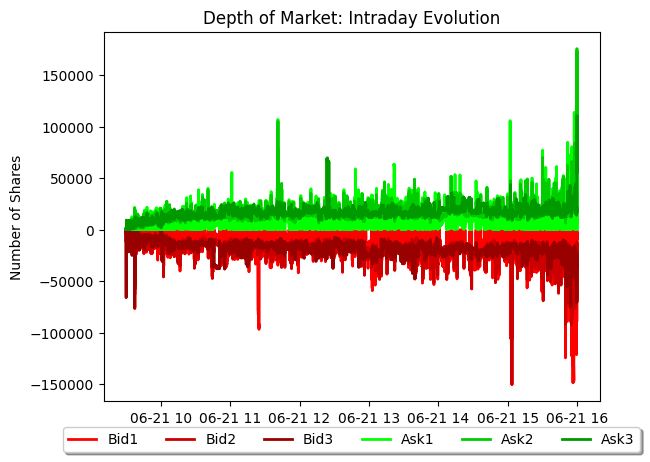

In [30]:
DTT = combined_orderbook_data

import matplotlib.pyplot as plt

plt.figure()

# Plot bid sizes
plt.plot(DTT['Time'], -DTT['BidSize1'], color=[1.0, 0, 0], linewidth=2, label='Bid1')
plt.plot(DTT['Time'], -DTT['BidSize2'], color=[0.8, 0, 0], linewidth=2, label='Bid2')
plt.plot(DTT['Time'], -DTT['BidSize3'], color=[0.6, 0, 0], linewidth=2, label='Bid3')

# Plot ask sizes
plt.plot(DTT['Time'], DTT['AskSize1'], color=[0, 1.0, 0], linewidth=2, label='Ask1')
plt.plot(DTT['Time'], DTT['AskSize2'], color=[0, 0.8, 0], linewidth=2, label='Ask2')
plt.plot(DTT['Time'], DTT['AskSize3'], color=[0, 0.6, 0], linewidth=2, label='Ask3')

plt.xlabel("Time")
plt.ylabel("Number of Shares")
plt.title("Depth of Market: Intraday Evolution")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)
plt.show()

2012-06-21 12:30:00


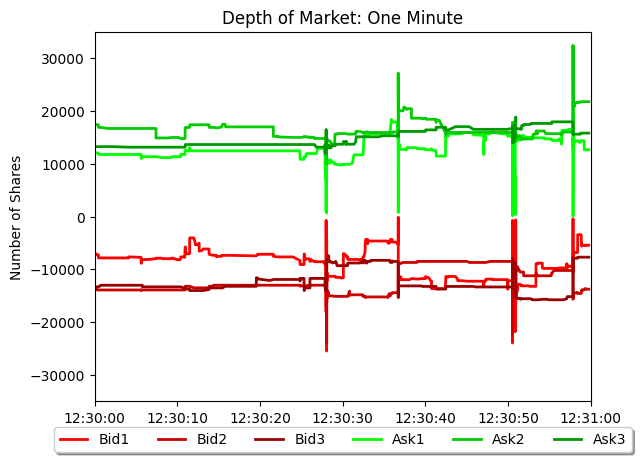

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

DTT = combined_orderbook_data

# convert seconds after midnight to datetime
start_time = pd.to_datetime('2012-06-21') + timedelta(seconds=45000)

print(start_time)
end_time = pd.to_datetime('2012-06-21') + timedelta(seconds=45060)

one_min_data = DTT[(DTT['Time'] >= start_time) & (DTT['Time'] < end_time)]

# plt.figure(figsize=(8, 6), dpi=250)
plt.figure()
# Plot bid sizes
plt.plot(one_min_data['Time'], -one_min_data['BidSize1'], color=[1.0, 0, 0], linewidth=2, label='Bid1')
plt.plot(one_min_data['Time'], -one_min_data['BidSize2'], color=[0.8, 0, 0], linewidth=2, label='Bid2')
plt.plot(one_min_data['Time'], -one_min_data['BidSize3'], color=[0.6, 0, 0], linewidth=2, label='Bid3')

# Plot ask sizes
plt.plot(one_min_data['Time'], one_min_data['AskSize1'], color=[0, 1.0, 0], linewidth=2, label='Ask1')
plt.plot(one_min_data['Time'], one_min_data['AskSize2'], color=[0, 0.8, 0], linewidth=2, label='Ask2')
plt.plot(one_min_data['Time'], one_min_data['AskSize3'], color=[0, 0.6, 0], linewidth=2, label='Ask3')

plt.xlim([start_time, end_time])  # set the x-axis limits
plt.ylim([-35000, 35000])  # set the y-axis limits

plt.xlabel("Time")
plt.ylabel("Number of Shares")
plt.title("Depth of Market: One Minute")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)

plt.show()

In [32]:
# TODO: save combined orderbooks data as h5

def save_df_to_h5(data, h5_path, key):
    """
    Save a DataFrame to an h5 (HDF5) file.

    Parameters:
    data (pandas.DataFrame): The DataFrame to save.
    h5_path (str): The path to save the h5 file.
    key (str): Identifier for the group in the store.
    """
    # Save the DataFrame as h5
    data.to_hdf(h5_path, key=key, mode='w', format='table')

## Example usage
save_df_to_h5(combined_orderbook_data, './data/LOB3data.h5', 'data')
